# Working with APIs #

In last two tutorials, we learned how to automatically retrieve pages from the internet through **web scraping**. We sent HTTP requests with the  ``requests`` and the ``selenium`` libraries and used the ``BeautifulSoup`` library to parse and work with the HTML code from the response we got. For many of the more popular websites such as Wikipedia, Youtube, Twitter or many newspapers, there is a more direct way to retrieve the information we need: through so-called **APIs**. In this tutorial we will learn how to gather web data through APIs. We will use the Wikipedia API to illustrate the process.

To follow allong with the tutorial, you will have to import the ``requests`` and the ``BeautifulSoup`` library:


In [1]:
import requests
from bs4 import BeautifulSoup

## What is an API?

- API stands for Application Programming Interface.
- It is a set of rules allowing different software applications to communicate.
- APIs are not for human interaction — they are interfaces for programs.

- RESTful APIs
  * Most modern Web APIs follow the REST architecture — hence called RESTful APIs
  * REST (Representational State Transfer) uses standard HTTP methods:
    + ``GET``: retrieve data
    + ``POST``: send new data
    + ``PUT``: update data
    + ``DELETE``: remove data
  * Benefits:
    + Platform-independent communication.
    + Scalable and flexible due to its stateless, resource-based design.
    + Widely supported across programming languages and environments.

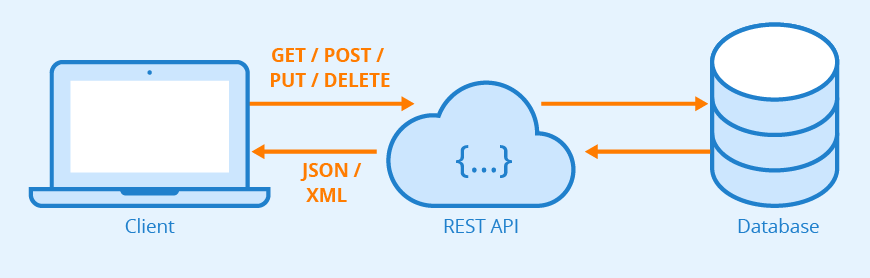

## Examples

### Getting Data in a clean format

- Many providers of open data provide API access to their data
- E.g. OECD or World Bank
- Request can be tailored towards what you need and the data comes in a nicely machine readable form and usually is "tidy".

### Getting very recent of even realtime data

- stock market information
- trading bots

### Getting Newspaper articles

- Some Newspapers provide data on their articles via APIs, e.g.
- New York Times API (only abstracts, not full texts)
- Guardian API (fulltexts)

### Enriching data

- Namsor API: can translate names of persons into variables like gender and origin
- Getting coordinates from addresses (e.g. Google Maps API, OpenCage, Nominatim, Mapbox)

### Using AI via API

- Gemini: free to use but restrictive rate limits
- ChatGPT: rather cheap, especially if you stick to the smaller models

## Making API requests with the ``requests`` library

How can we gather data through an API? In practice, **retrieving data through an API is quite similar to retrieving data through web scraping**. You will also have to **figure out the correct URL** for your request. In fact, you can type this URL into the browser — **instead of a designed web page, you will directly see structured data**. For example, this URL takes you to the structured data from the [cat article](https://en.wikipedia.org/wiki/Cat) on Wikipedia: https://en.wikipedia.org/w/api.php?action=parse&page=Cat&format=json

If we want to request the cat article through the API, we can thus just type:

In [ ]:
r = requests.get("https://en.wikipedia.org/w/api.php?action=parse&page=Cat&format=json")
r.text

Let's take a closer look at the URL we used: The first part of the URL (https://en.wikipedia.org/w/api.php) is an **endpoint** of the API. You can think of endpoints as the base URLs of the API. After the ``?`` we have the **query string**. It specifies the action we want to perform.


<img src="https://github.com/hackstutz/cas_gdd/blob/main/img/api_parameters.png?raw=true" width = "650">

Usually, it is more convenient to enter the parameters for the query string as an argument. The **``params`` parameter of the ``get`` function** allows you to do this (the order of the parameters typically does not matter):

In [ ]:
ENDPOINT = "https://en.wikipedia.org/w/api.php"

PARAMS = {
    "action": "parse",
    "page": "Cat",
    "format": "json",
}

r = requests.get(url=ENDPOINT, params=PARAMS)
r.text

To see that this makes exactly the same request, you can take a look the URL we just called:

In [ ]:
r.url

So far, so good. But how did we figure out that https://en.wikipedia.org/w/api.php?action=parse&page=Cat&format=json was the URL we needed to request? Many APIs have an extensive **documentation** that explain how to make different types of requests. These documentations can sometimes be overwhelming and it is usually a good idea to try to find some examples for the type of request you want to make (e.g. on Stack Overflow, AI, or within the documentation). Let's have a look at the documentation for the Wikipedia API:

* https://www.mediawiki.org/wiki/API:Main_page

We can see that there are different endpoints. For example, there is one endpoint for each language. The endpoint for English Wikipedia is:
* https://en.wikipedia.org/w/api.php

Now we will have to figure out what parameters to choose (i.e. how to construct the query string). If you scroll down on the page, you will see that there are many options as to how the parameters could be set. If you click through the documentation (or Google something like "parse page Wikipedia API") you may eventually get to this page that provides some useful examples as to how the content of a page could be retrieved:
* https://www.mediawiki.org/wiki/API:Parsing_wikitext

There, you will find example code similar to the one we used above.



><font color = 4e1585> SIDENOTE: APIs often allow you to do many different things. You can retrieve information, but sometimes you can also add, change or delete information. Many Web APIs are so-called RESTful APIs, meaning that they implement the standard HTTP methods: GET, POST, PUT and DELETE. For data science projects, you are most of the times interested in GET requests (as you don't want to change anything on the respective websites). </font>

## Working with JSON data

APIs allow you to access *structured data*. What exactly does this mean? Typically, the data you will retrieve through an API will be formatted as **JSON**. JSON stands for JavaScript Object Notation; it is a data exchange format based on human-readable text (as opposed to binary data formats) that is commonly used for data transportation over the web. Let's take a look at some JSON code:



```json
{
  "name": "Peter",
  "age": 56,
  "married": false,
  "children": [
    {
      "name": "Nina",
      "age": 19,
      "educational degree": "High school"
    },
    {
      "name": "Mary",
      "age": 14,
      "educational degree": null
    }
  ]
}
```



><font color = 4e1585> SIDENOTE: If you want to know if something is valid (correctly formatted) JSON you can search for 'JSON lint' or 'JSON linter' and use one of the online tools, e.g. https://jsonlint.com. A lint or linter is a tool to check for errors in code (see https://en.wikipedia.org/wiki/Lint_(software) for more details)</font>

You may have noticed that JSON does not look so different from a Python dictionary. The great thing about JSON is that it can easily be **converted into a (nested) Python dictionary**. Let's parse the response we got from our Wikipedia API request:

In [5]:
data = r.json()

In [ ]:
print(data)
type(data)

We have now created a (large) Python dictionary. How can we **access the different parts** of it? If you **type the URL of your request into your browser**, you can explore the nested structure of the JSON code (and thus of your Python dictionary):


In [ ]:
r.url # this will display the URL; copy the URL to your browser and see what happens


Similarly, it is usually a good idea to explore the **keys** of the dictionary:

In [ ]:
data.keys()

We only have one key at the top level (``parse``). Let's explore its value to see what we have on the next level:  

In [ ]:
data["parse"].keys()

Now we can access different types of information about the page. Let's access the title:

In [ ]:
data["parse"]["title"]

Let's now try to access the sections:

In [ ]:
sections = data["parse"]["sections"]
sections[0]

We got a list of dictionaries containing information on each section. If we are only interested in the heading of each section, we could write a list comprehension to extract it. The "line" key in each dictionary appears to contain the section heading.

In [ ]:
[section["line"] for section in sections]

In this way, you can access different parts of your dictionary and extract the information on the page (e.g. internal and external links, images etc.). The dictionary (within "parse") **also contains a "text" key where the HTML code of the article is stored** (within the "*" key). You can convert it to a BeautifulSoup object and search it based on HTML tags (see notebook on web scraping):

In [ ]:
# Get html text
html_text = BeautifulSoup(data["parse"]["text"]["*"])
type(html_text)

In [ ]:
# get opening paragraph
html_text.find_all("p")[1]

---

>  <font color='teal'> **In-class exercise**:
Request the *Dog* page on Wikipedia (formatted as JSON) through the API and convert the response to a Python dictionary.

>  <font color='teal'> Print the title and all links (stored just as the page names) to other Wikipedia articles.



---



## Making advanced requests with the Wikipedia API

The Wikipedia API allows you to do much more than just retrieving a single page. For example, you can search for **pages that match with certain words** (full text search in title or content: https://www.mediawiki.org/wiki/API:Search or https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bsearch). Let's retrieve all pages about cats:

In [14]:
# Perform page search
URL = "https://en.wikipedia.org/w/api.php"

PARAMS = {
    "action": "query",
    "format": "json",
    "list": "search",
    "srsearch": "cat",
    "srlimit": "max"
}

r = requests.get(url=URL, params=PARAMS)

# Convert to dictionary
DATA = r.json()

In [ ]:
DATA.keys()

In [ ]:
# Navigate through dictionary
print(DATA["query"].keys())

In [ ]:
# Get titles of all cat pages that were found
pages = DATA["query"]["search"]
cat_pages = [page["title"] for page in pages]
print(cat_pages)
len(cat_pages)

Another interesting thing you can do is to **find pages based on coordinate locations** (see: https://www.mediawiki.org/wiki/API:Geosearch). Let's find all Wikipedia pages of places that are close (<1km) to the main building of the University of Bern:

In [23]:
# Perform page search
URL = "https://de.wikipedia.org/w/api.php"  # Change to German Wikipedia!

PARAMS = {
    "action": "query",
    "format": "json",
    "list": "geosearch",
    "gscoord": "46.950519|7.438109",
    "gslimit": "max",
    "gsradius": 1000
}

r = requests.get(url=URL, params=PARAMS)

# Convert to dictionary
DATA = r.json()

In [ ]:
PLACES = DATA['query']['geosearch']
[place["title"] for place in PLACES]

There are many more things you can do with the Wikipedia API. Some of them would be extremely difficult (or impossible) to achieve through web scraping (e.g. the two examples in this section). Check out the documentation (or Google/AI your idea) to find out!

## Sidenote: Using the ``wikipedia`` module for simple requests

For many of the more popular APIs, someone has written a **Python module** that allows you to work with the API more conveniently. For example, there is a **``wikipedia`` module** to work with the Wikipedia API (see here for a documentation: https://pypi.org/project/wikipedia/):

In [ ]:
# install and import wikipedia module
!pip install wikipedia # When ! is being added at the beginning the statement is performed in the command-line!
import wikipedia

In [ ]:
# Search for pages about cats
wikipedia.search("Cat") # only first 10 results by default

In [28]:
# Get contents of cat page
wikipedia.page('Cat', auto_suggest=False).content

'The cat (Felis catus), also referred to as the domestic cat or house cat, is a small domesticated carnivorous mammal. It is the only domesticated species of the family Felidae. Advances in archaeology and genetics have shown that the domestication of the cat occurred in the Near East around 7500 BC. It is commonly kept as a pet and farm cat, but also ranges freely as a feral cat avoiding human contact. It is valued by humans for companionship and its ability to kill vermin. Its retractable claws are adapted to killing small prey species such as mice and rats. It has a strong, flexible body, quick reflexes, and sharp teeth, and its night vision and sense of smell are well developed. It is a social species, but a solitary hunter and a crepuscular predator.\nCat intelligence is evident in their ability to adapt, learn through observation, solve problems and research has shown they possess strong memories, exhibit neuroplasticity, and display cognitive skills comparable to a young child. 

Such modules can be very convenient if you want to perform simple requests. However, they are often not very flexible and may not always allow you to make the requests you would like to perform. <font color='red'>Moreover, the quality may vary (anyone can program and upload such a module) as the following example shows:</font>

In [ ]:
#wikipedia.page('Cat') # Search for 'Cat' shows result for 'Can', as auto_suggest parameter is True by default.

---

>  <font color='teal'> **In-class exercise**:
Retrieve 20 Wikipedia pages that are located within a 2 km radius from the main train station in Bern (46.949722°, 7.439444°)

>  <font color='teal'> How far is each place from the train station? Create a dictionnary (or a pandas DataFrame) that shows the distances for all the pages you found.



---



## Working with APIs in practice

Now we have seen many different ways to retrieve data from the web and you might be asking yourself: When should I do web scraping? When should I use an API? When should I use a Python module (that accesses an API)?

Or course, this depends on your project and on your preferences, but here's a rule of thumb:

* Whenever there is an **API**, it is usually easier to work with it than to scrape the pages. Also, some data is only really accessible through APIs (e.g. if you want to retrieve all tweets about a certain topic on Twitter). So if there's an API, it's usually (but of course not always) a good idea to use it!

* If there's a **Python library** for the API, it is a good idea to check it out and see what it can do. If it suits your needs, it may save you a lot of work (reading the API documentation etc.). However, some people prefer to work directly with the API to keep full control over their implementation.

* **Web scraping** is useful when there is no API, which is the case for most websites. For some tasks, you may also find it easier to just scrape the pages instead of trying to find out how the API works.



When you start working with other APIs you will notice that each one works a bit differently. For example, many APIs require **authentication** (e.g. Twitter API, Google Maps API, Facebook API etc.). This means that you will first have to create a "developer account" and will then get some credentials you have to include into your request. You will have to read the documentation of the API (or some blog or answer on Stack Overflow) to find out how this works for the API you are interested in. Also, not all APIs give you **free access** to all the data. For example, the Google Maps API will start to charge you a price after a certain amount of requests, so be careful with your implementation.

APIs are becoming increasingly common and larger providers usually have one (or several). Here are some **APIs you may find useful for future research projects**:

| Name | Link | Python Module(s) |
| --- | --- | --- |
| Wikipedia API | https://www.mediawiki.org/wiki/API:Main_page | wikipedia, Wikipedia-API |
| Twitter API | https://developer.twitter.com/en/docs/twitter-api | twitter, tweepy |
 Google Maps API| https://developers.google.com/maps/documentation | python-gmaps|
| LinkedIn API|https://www.linkedin.com/developers/|python-linkedin-v2|
| New York Times API|https://developer.nytimes.com/apis| pynytimes|
| The Guardian API |https://open-platform.theguardian.com/documentation/||
| COVID-19 API |https://covid19api.com/ |
| Google Trends (no official API) | https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f | pytrends|
| Namsor API | https://namsor.app/api-documentation/ |namsor-client |
| World Bank Indicators | https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation |world_bank_data |
| OECD Data | https://www.oecd.org/en/data/insights/data-explainers/2024/09/api.html |oecddatabuilder |
| ChatGPT | https://openai.com/api/ |openai/ |
| Gemini | https://ai.google.dev/gemini-api/docs |google-generativeai |

---

>  <font color='teal'> **In-class exercise**:
Choose an API (e.g., from the list above or based on your own ideas/research) and try to find out how it works:
> - Is it free of charge?
> - Does it require authentication (i.e., do you need to crate an account, generate access tokens etc.)?
> - What can it do (that might be interesting for a data science project)?
> - Where can you find the documentation?
> - Is there a Python module that facilitates working with the API?

>  <font color='teal'>If there is time (and the API is free): Try to make a request through the API.
>
>  <font color='teal'>You may work in groups!

In [42]:
import requests
import pandas as pd

# Set the indicator and year
indicator = "NY.GDP.PCAP.CD"  # GDP per capita (current US$)
year = "2022"
format_type = "json"

# URL to fetch data for all countries (up to 1000 results)
url = f"http://api.worldbank.org/v2/country/all/indicator/{indicator}?format={format_type}&date={year}&per_page=1000"

# Make the API request
response = requests.get(url)

# Parse the JSON response
data = response.json()

# Extract and process the data if available
if data and len(data) > 1 and data[1]:
    records = data[1]
    gdp_data = [
        {
            "Country": record["country"]["value"],
            "Country Code": record["country"]["id"],
            "Year": record["date"],
            "GDP per Capita (US$)": record["value"]
        }
        for record in records
    ]
    # Create DataFrame
    df = pd.DataFrame(gdp_data)
    print(df)
else:
    print("No data found or an error occurred.")


                            Country Country Code  Year  GDP per Capita (US$)
0       Africa Eastern and Southern           ZH  2022           1628.024526
1        Africa Western and Central           ZI  2022           1777.235012
2                        Arab World           1A  2022           7658.406470
3            Caribbean small states           S3  2022          15564.557621
4    Central Europe and the Baltics           B8  2022          19502.816931
..                              ...          ...   ...                   ...
261           Virgin Islands (U.S.)           VI  2022          44320.909186
262              West Bank and Gaza           PS  2022           3799.955270
263                     Yemen, Rep.           YE  2022            615.702079
264                          Zambia           ZM  2022           1447.123101
265                        Zimbabwe           ZW  2022           2040.552459

[266 rows x 4 columns]


In [46]:
df = df.sort_values(by="GDP per Capita (US$)", ascending=False)
df

,Country,Country Code,Year,GDP per Capita (US$)
179,Monaco,MC,2022,226052.001905
163,Liechtenstein,LI,2022,186400.233768
165,Luxembourg,LU,2022,125006.021815
70,Bermuda,BM,2022,120897.311155
196,Norway,NO,2022,108798.451166
...,...,...,...,...
143,Isle of Man,IM,2022,NaN
152,"Korea, Dem. People's Rep.",KP,2022,NaN
227,South Sudan,SS,2022,NaN
232,St. Martin (French part),MF,2022,NaN
